In [1]:
import pandas as pd,numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("E:/Machin Learning notes imp/Heart_Prediction Decision tree/heart_v2 (2).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
df['sex'].value_counts()

1    183
0     87
Name: sex, dtype: int64

In [6]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [7]:
X= df.drop('heart disease',axis =1)
y = df['heart disease'].copy()

In [8]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state= 42)

In [12]:
x_train.shape,x_test.shape

((189, 4), (81, 4))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier(max_depth=4)

In [15]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [16]:
pip install six


Note: you may need to restart the kernel to use updated packages.


In [17]:
import sys
!{sys.executable} -m pip install pydotplus


In [18]:

import sys
!{sys.executable} -m pip install graphviz


In [19]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


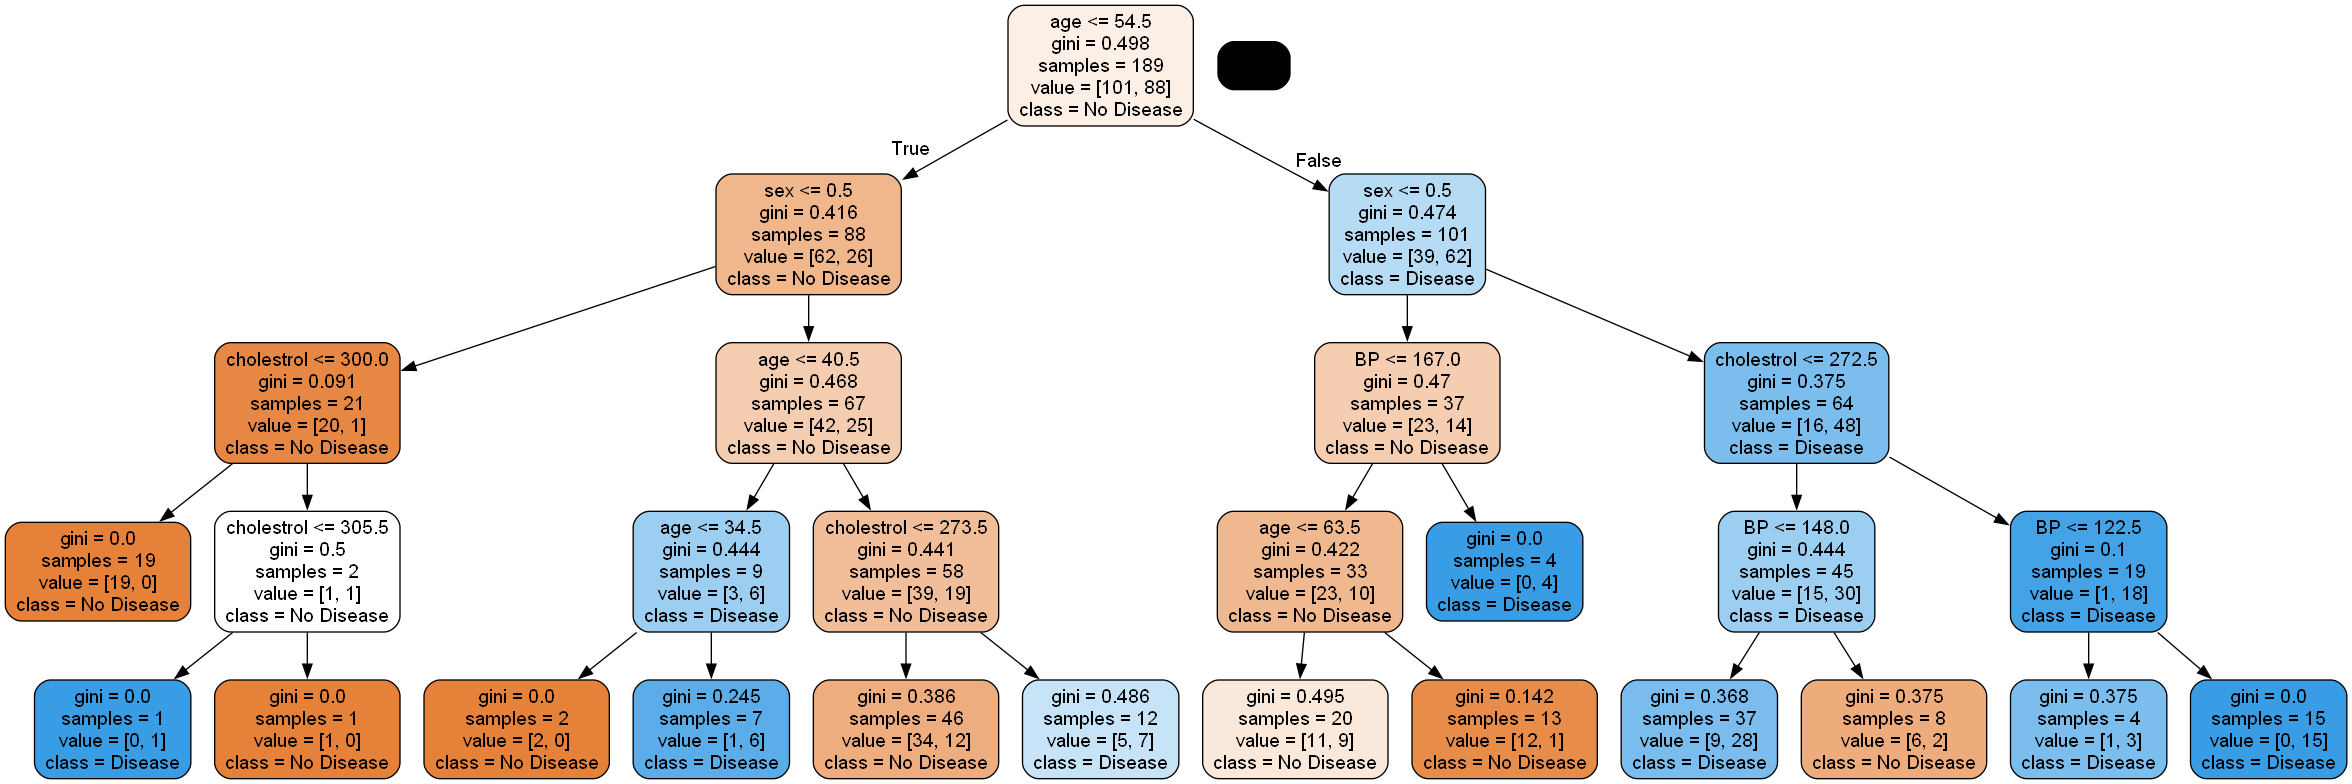

In [20]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


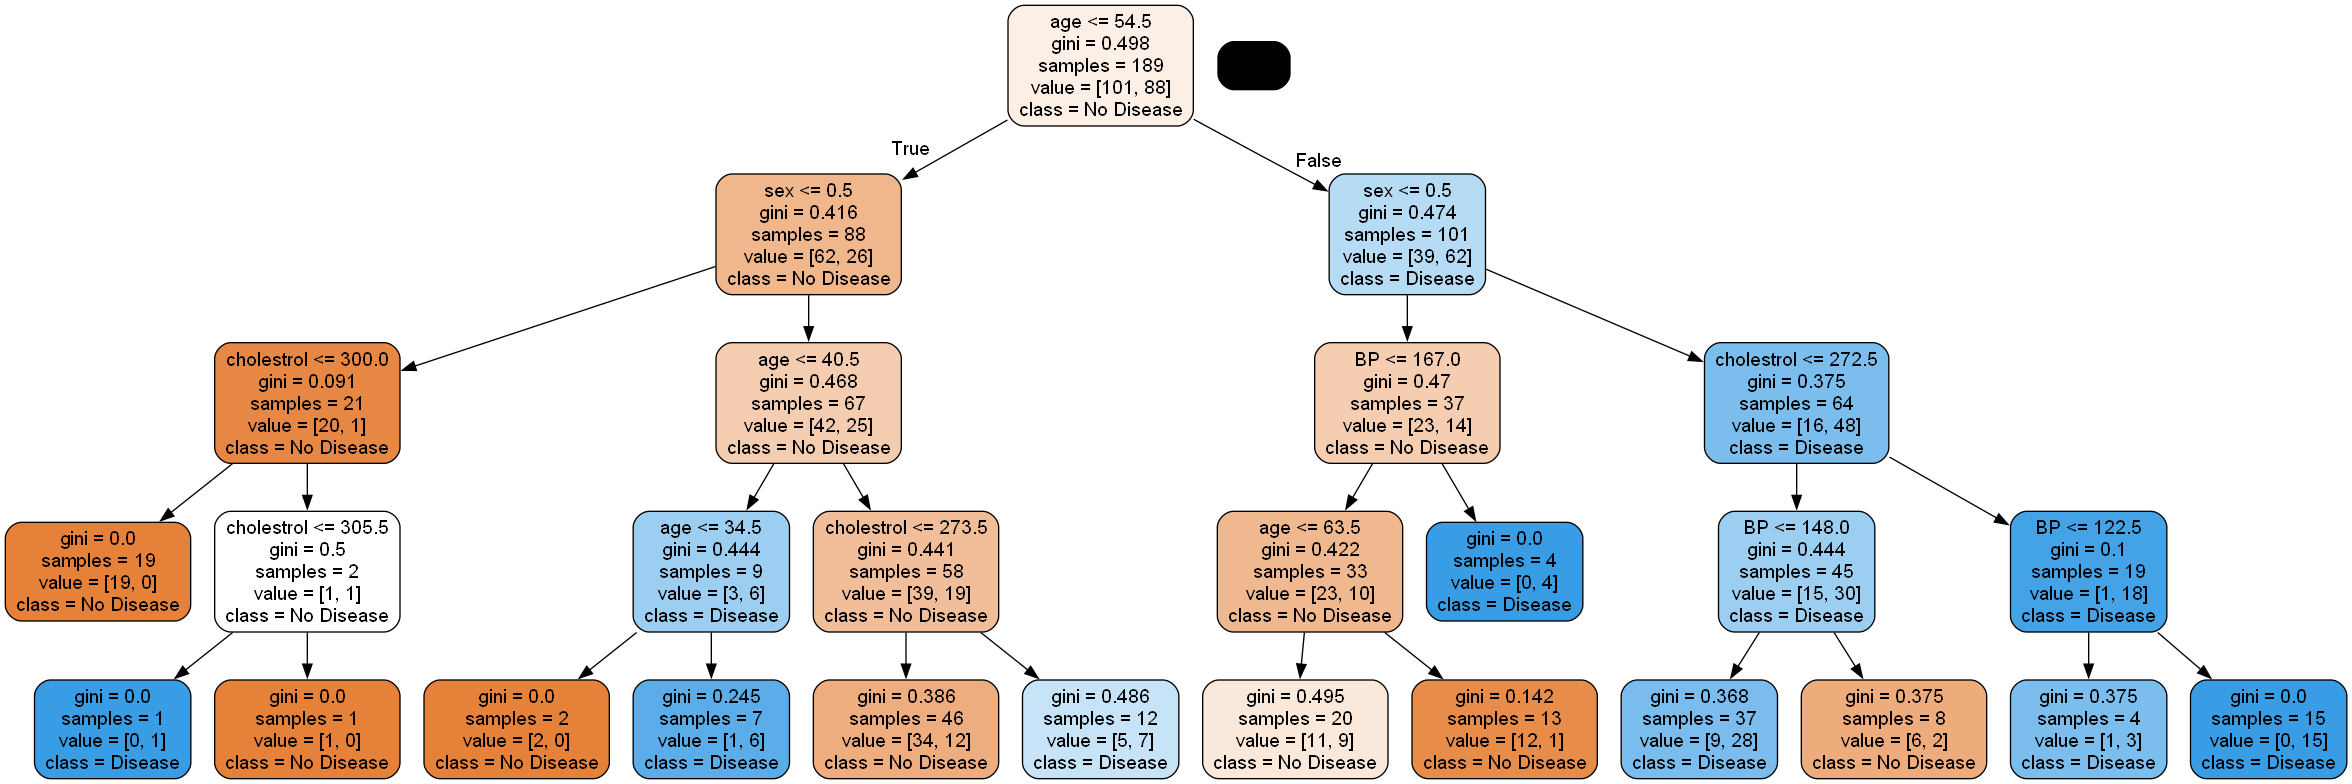

In [21]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO

# Assuming 'dt' is your decision tree model and 'X' is your feature matrix
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', 'Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [22]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)



In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [24]:
print("Train results")
print (accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

Train results
0.7883597883597884


array([[85, 16],
       [24, 64]], dtype=int64)

In [25]:
print("Test Result")
print (accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

Test Result
0.6296296296296297


array([[34, 15],
       [15, 17]], dtype=int64)

In [26]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [27]:
def get_dt_graph(dt_classifier):
   dot_data = StringIO()  
   export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', 'Disease'])

   graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
   return graph

In [44]:
def evaluate_model (dt_classifier):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_train_pred = dt_classifier.predict(x_train)
    y_test_pred = dt_classifier.predict(x_test)

    print("Train results")
    print (accuracy_score(y_train,y_train_pred))
    print(confusion_matrix(y_train,y_train_pred))
    print("-"*50)
    print("Test Result")
    print (accuracy_score(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))
    

In [45]:
 evaluate_model(dt)

Train results
0.7883597883597884
[[85 16]
 [24 64]]
--------------------------------------------------
Test Result
0.6296296296296297
[[34 15]
 [15 17]]


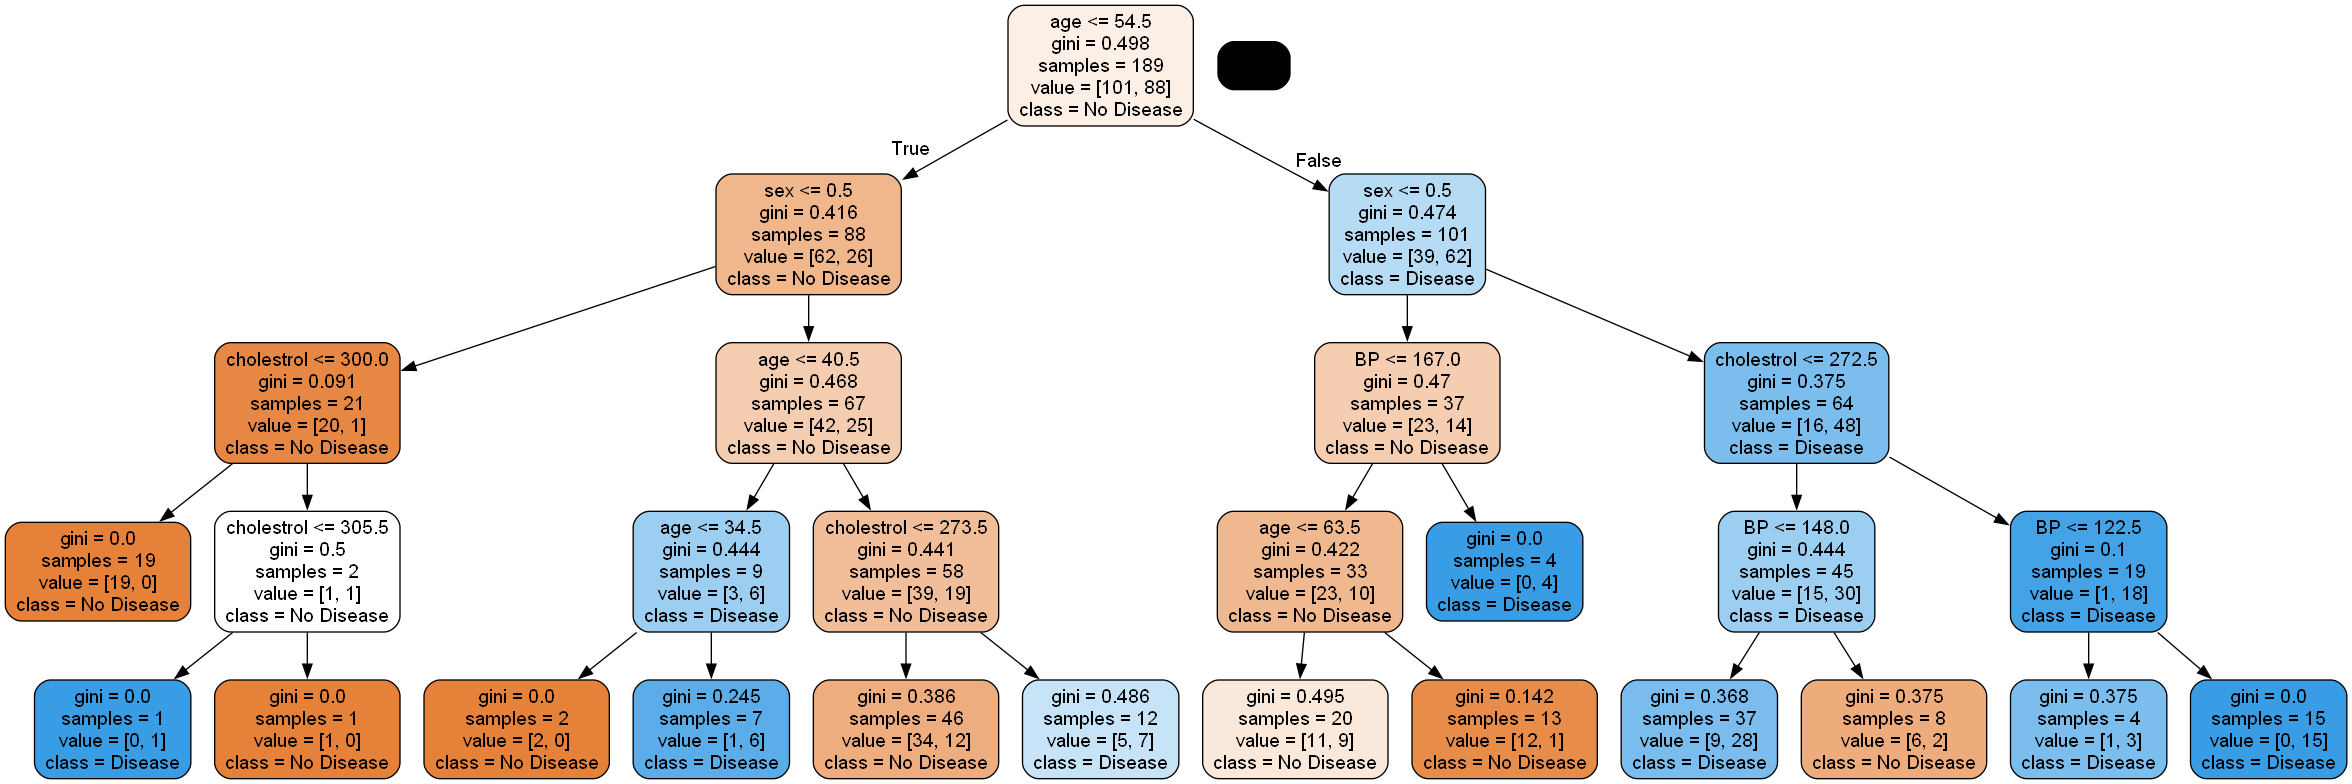

In [61]:
gph=get_dt_graph(dt)
Image(gph.create_png())

In [62]:
dt_default =DecisionTreeClassifier(random_state=42)
dt_default.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

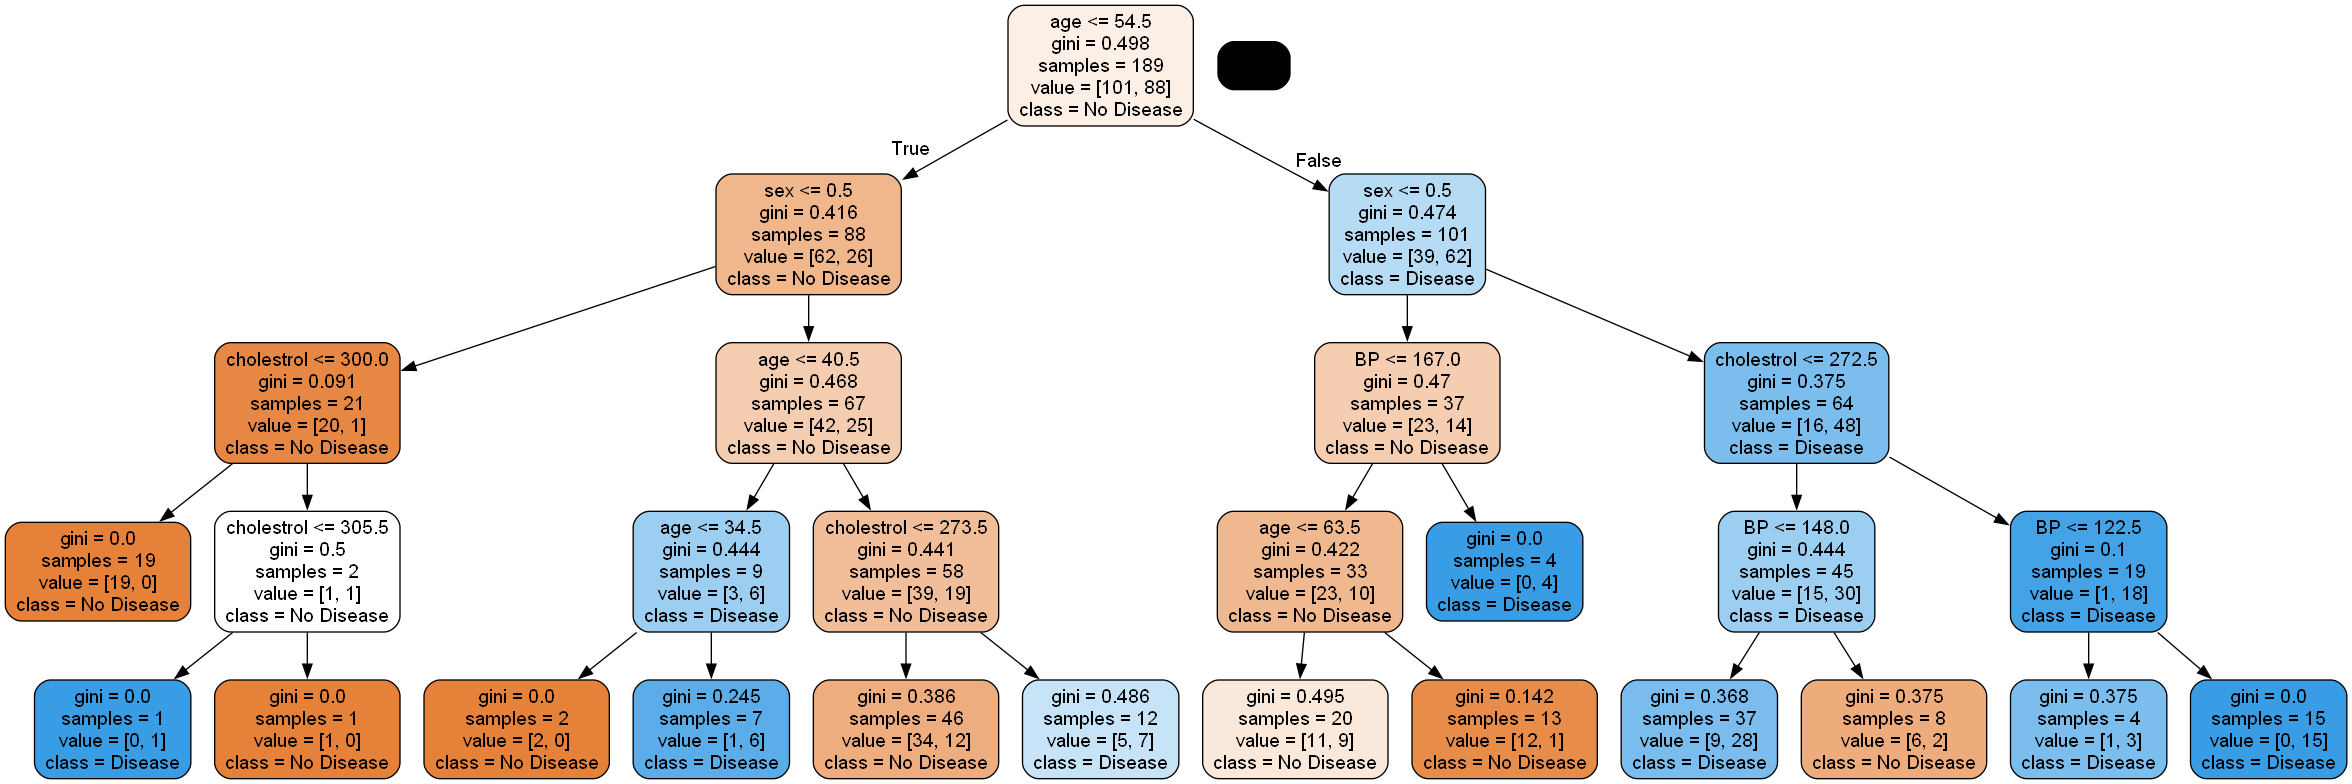

In [64]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [65]:
evaluate_model(dt_default)

Train results
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Result
0.6296296296296297
[[31 18]
 [12 20]]


In [66]:
dt_depth = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_depth.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

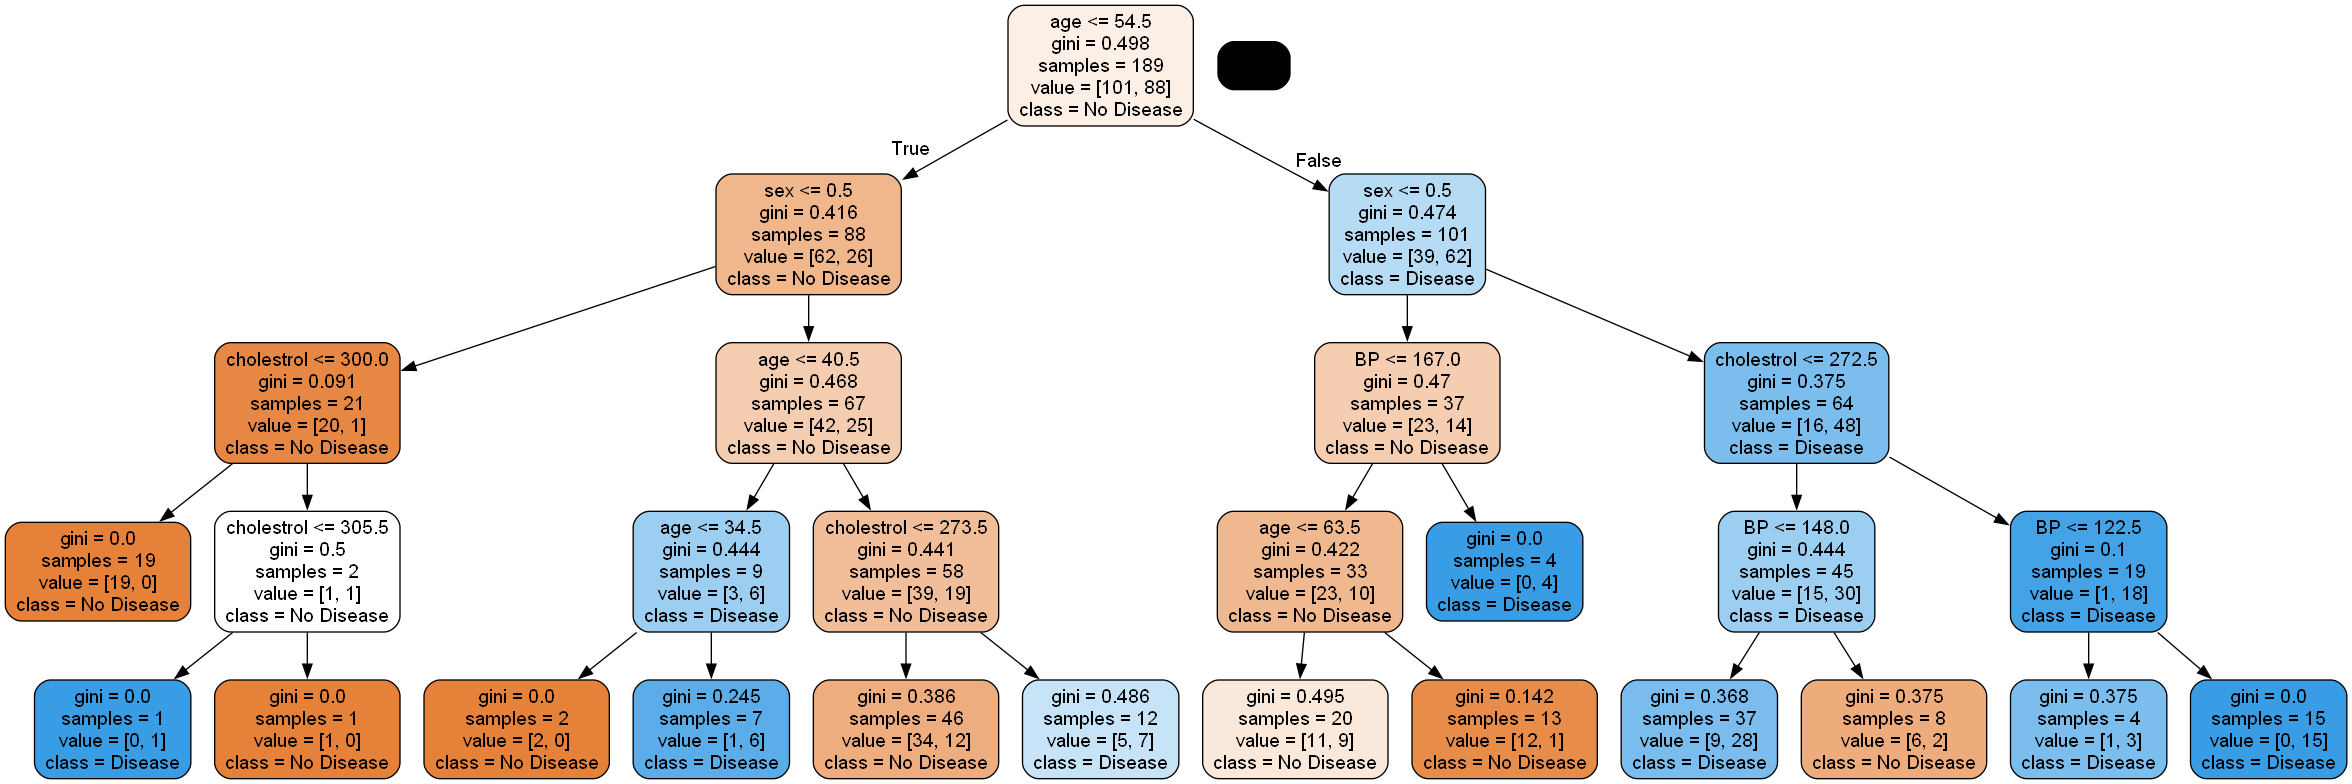

In [67]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [68]:
evaluate_model(dt_depth)

Train results
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test Result
0.6049382716049383
[[35 14]
 [18 14]]


In [69]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

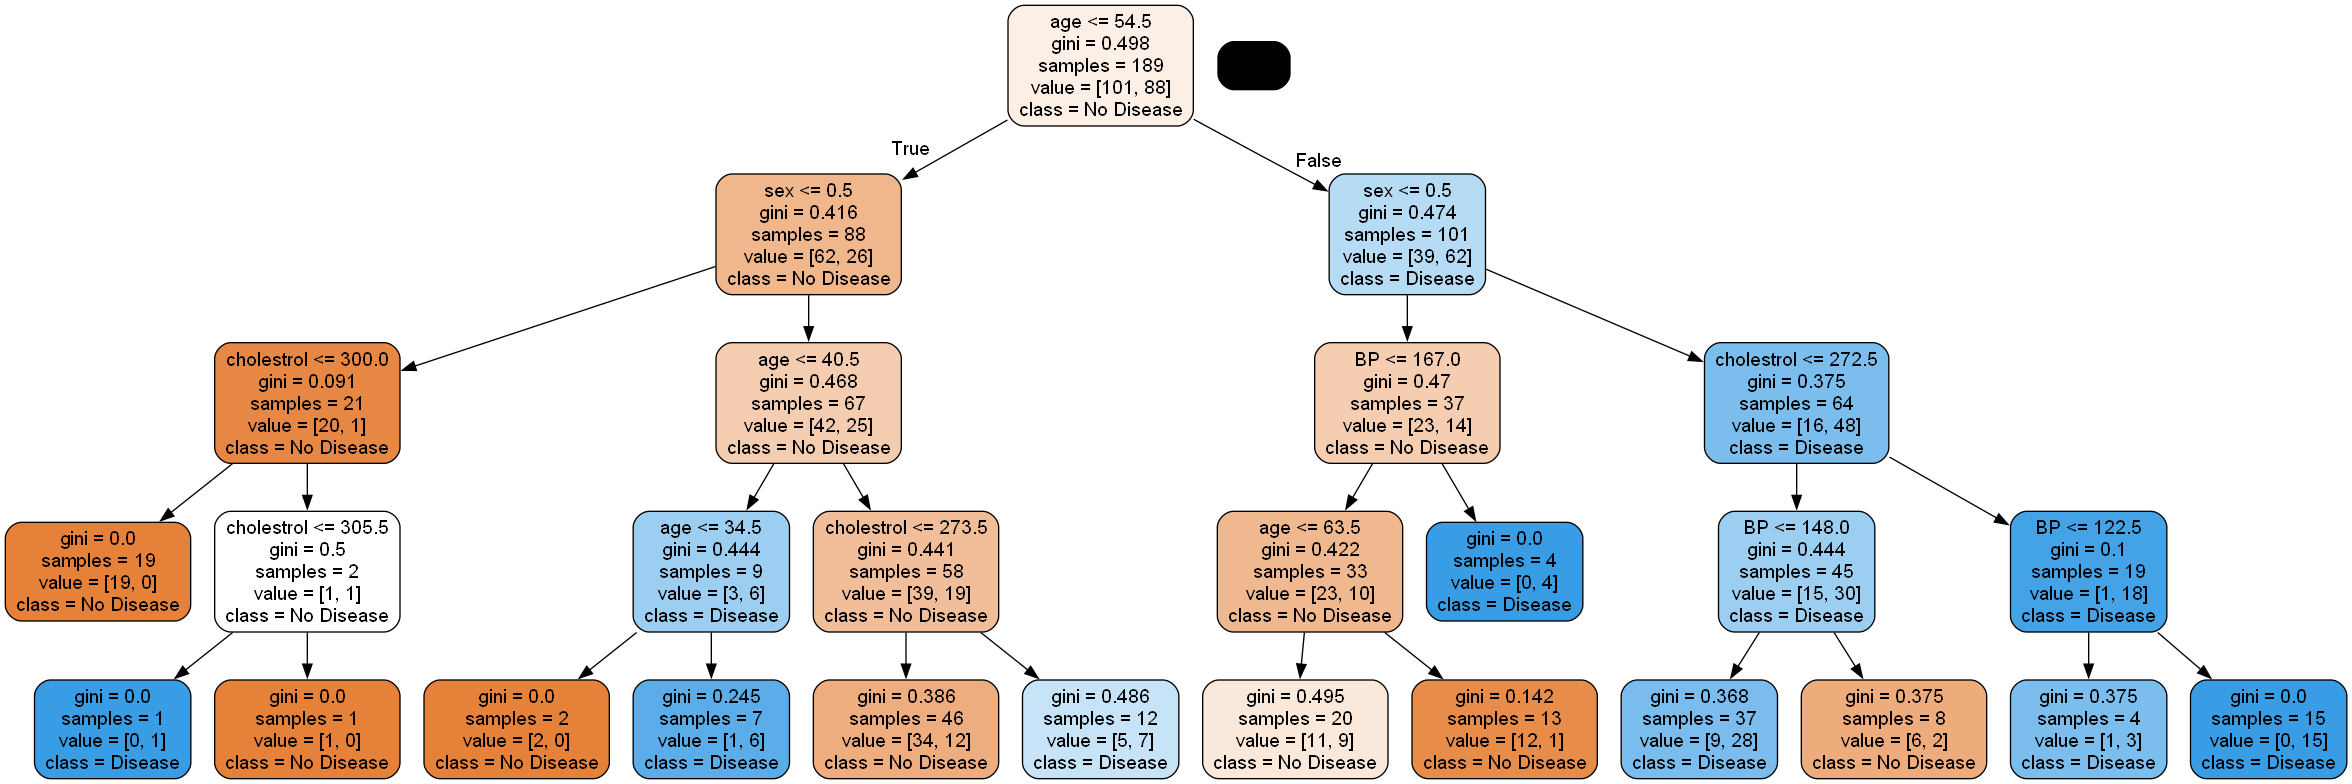

In [71]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [72]:
evaluate_model(dt_min_split)

Train results
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test Result
0.6419753086419753
[[32 17]
 [12 20]]


In [73]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

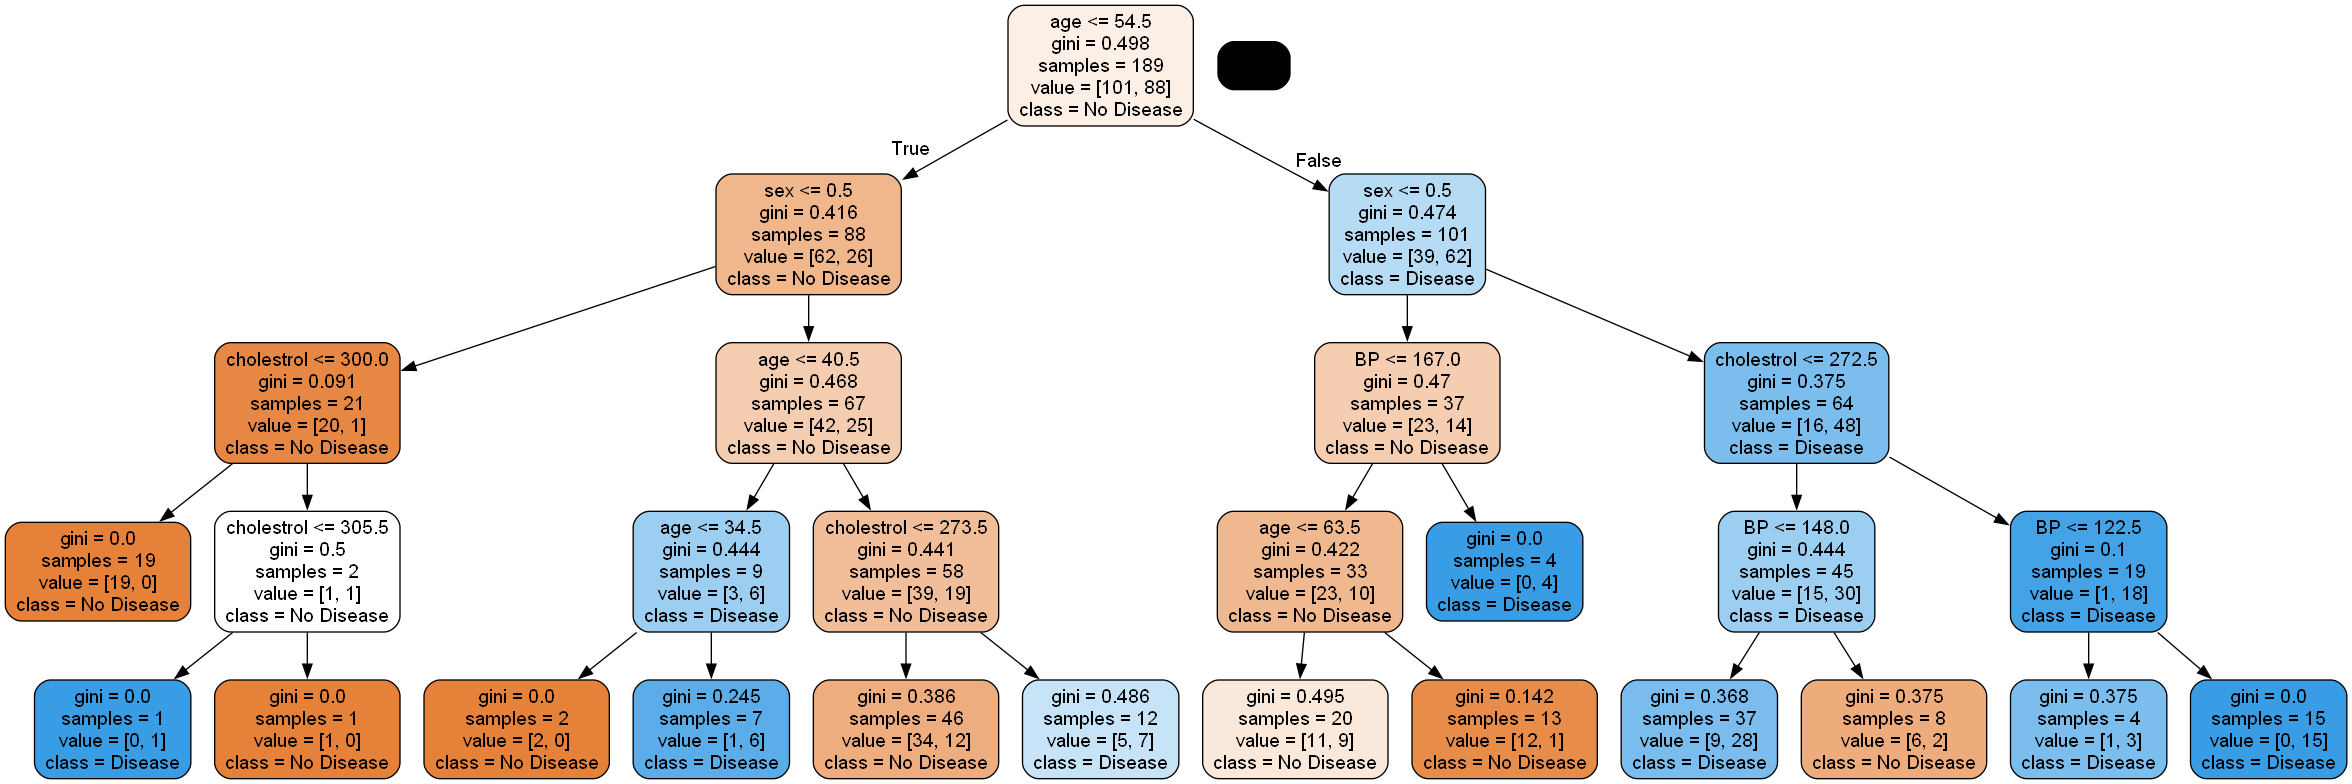

In [74]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [75]:
evaluate_model(dt_min_leaf)

Train results
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Result
0.6419753086419753
[[38 11]
 [18 14]]


In [79]:
dt_min_leaf_entropy= DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion="entropy")
dt_min_leaf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

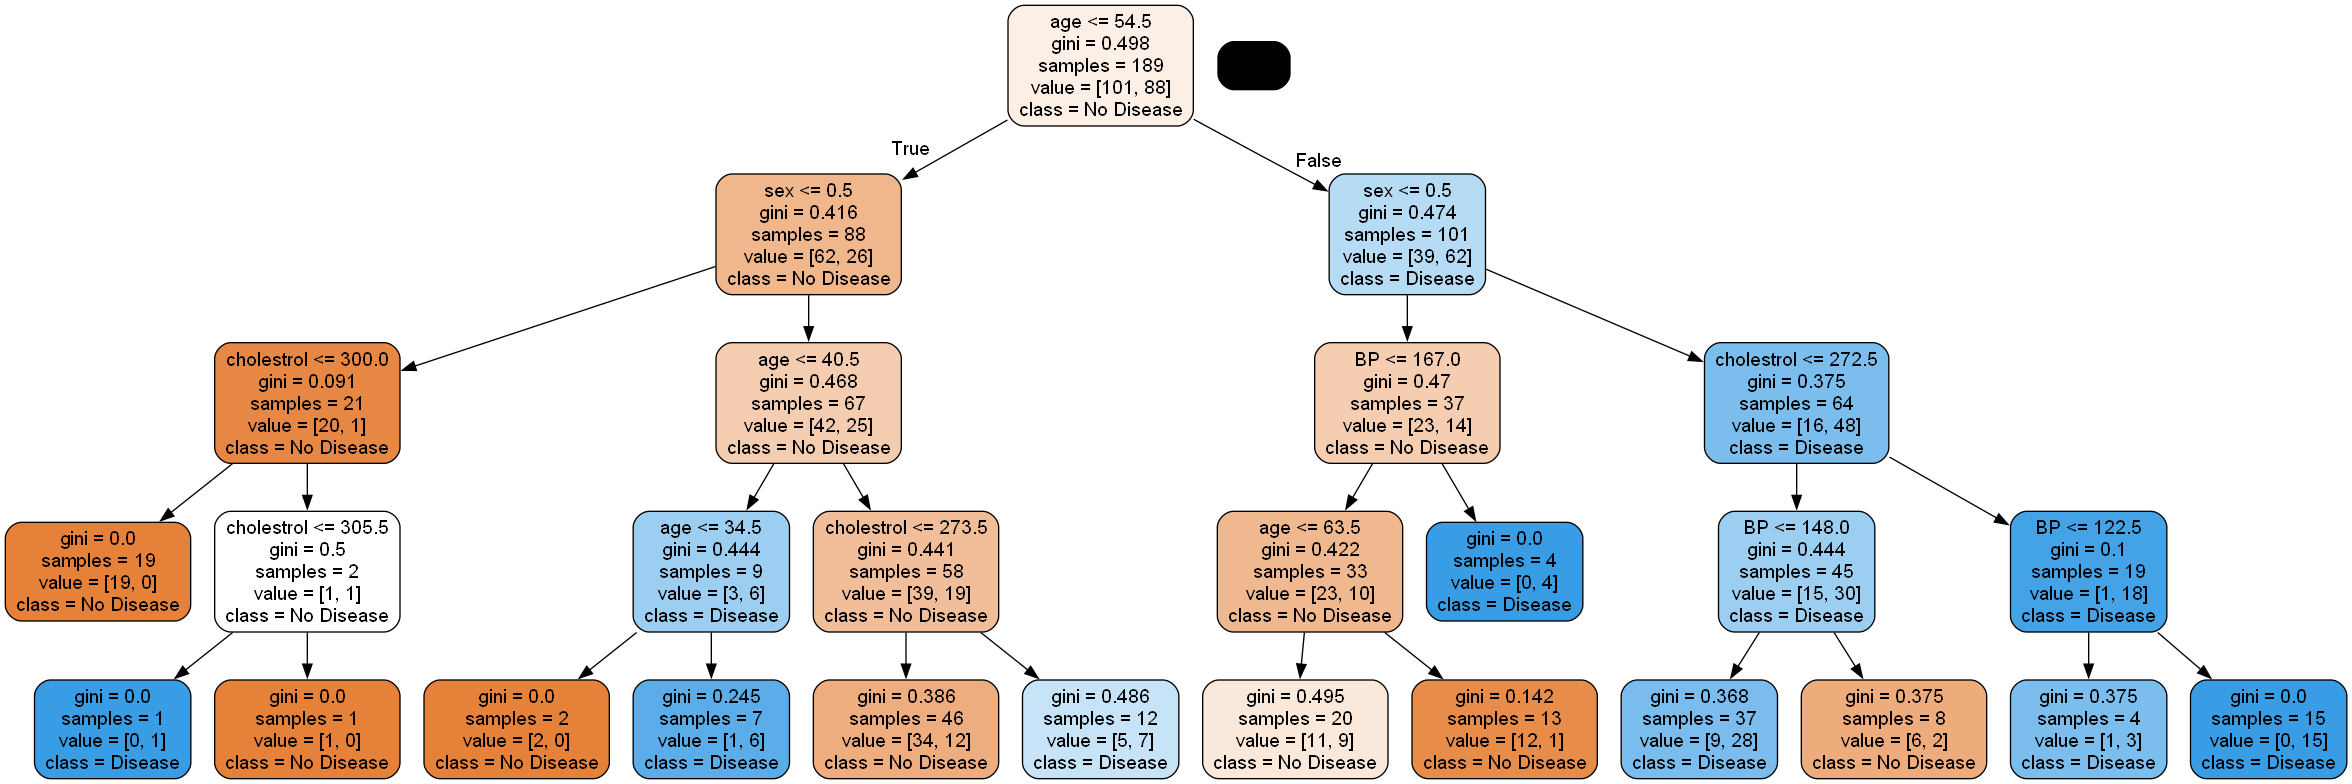

In [80]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [81]:
evaluate_model(dt_min_leaf_entropy)

Train results
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Result
0.6419753086419753
[[38 11]
 [18 14]]


In [82]:
dt = DecisionTreeClassifier()


In [83]:
from sklearn.model_selection import GridSearchCV

In [88]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':['gini','entropy']
    
}

In [89]:
grid_search = GridSearchCV(estimator=dt,
            param_grid=params,
            cv=4,
            n_jobs=-1,verbose=1,
            scoring = 'accuracy')

In [90]:
%%time
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 78.1 ms
Wall time: 2.84 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [91]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006360,4.700049e-03,0.003741,0.001783,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,16
1,0.003989,5.462856e-07,0.002631,0.000410,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,16
2,0.002743,4.318810e-04,0.005984,0.005772,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,19
3,0.003242,4.322607e-04,0.001995,0.000002,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.002743,4.300927e-04,0.002124,0.000225,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [102]:
dt_best = grid_search.best_estimator_

In [95]:
grid_search.best_score_

0.6669991134751774

In [99]:
dt_best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [103]:
dt_best = grid_search.best_estimator_

In [100]:
 evaluate_model(dt_best)

Train results
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test Result
0.6172839506172839
[[36 13]
 [18 14]]
